In [1]:
from util import * 
pd.options.display.max_columns  = 999
df = pd.read_csv('prosperLoanData.csv')

# Prosper Loan Data Analysis

# Data Exploration
Let's first explore our dataset and see what are the avaliable columns. 

In [2]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Ok, to many columns, let's check the first of 5 rows of the dataset, but with complete columns first. 

***Columns ordered as complete columns first***


In [3]:
comp = (df.count() / df.shape[0]).sort_values() # Calculate the completeness % of each column. 
df[comp.index[::-1]].head() #Columns ordered as complete columns first

,Investors,CurrentlyInGroup,StatedMonthlyIncome,IncomeVerifiable,IncomeRange,InvestmentFromFriendsAmount,OpenRevolvingMonthlyPayment,OpenRevolvingAccounts,DateCreditPulled,IsBorrowerHomeowner,LoanCurrentDaysDelinquent,ListingCategory (numeric),LenderYield,BorrowerRate,LoanStatus,Term,ListingCreationDate,ListingNumber,LoanKey,ListingKey,LoanOriginationDate,LoanNumber,MemberKey,LP_InterestandFees,LP_CustomerPrincipalPayments,MonthlyLoanPayment,LoanOriginationQuarter,LP_ServiceFees,LoanOriginalAmount,LP_CollectionFees,LP_CustomerPayments,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,LoanMonthsSinceOrigination,BorrowerAPR,CreditScoreRangeUpper,CreditScoreRangeLower,FirstRecordedCreditLine,InquiriesLast6Months,CurrentDelinquencies,TotalCreditLinespast7years,PublicRecordsLast10Years,DelinquenciesLast7Years,TotalInquiries,EmploymentStatus,Occupation,BorrowerState,AvailableBankcardCredit,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,TotalTrades,RevolvingCreditBalance,CurrentCreditLines,OpenCreditLines,PublicRecordsLast12Months,BankcardUtilization,AmountDelinquent,EmploymentStatusDuration,DebtToIncomeRatio,ProsperRating (numeric),EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (Alpha),ProsperScore,ClosedDate,CreditGrade,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanFirstDefaultedCycleNumber,GroupKey
0,258,True,3083.333333,True,"$25,000-49,999",0.0,24.0,1,2007-08-26 18:41:46.780000000,True,0,0,0.1380,0.1580,Completed,36,2007-08-26 19:09:29.263000000,193129,E33A3400205839220442E84,1021339766868145413AB3B,2007-09-12 00:00:00,19141,1F3E3376408759268057EDA,1971.14,9425.00,330.43,Q3 2007,-133.18,9425,0.0,11396.14,0.0,0.0,0.0,1.0,0,0,78,0.16516,659.0,640.0,2001-10-11 00:00:00,3.0,2.0,12.0,0.0,4.0,3.0,Self-employed,Other,CO,1500.0,0.81,0.0,11.0,0.0,5.0,4.0,0.0,0.00,472.0,2.0,0.17,NaN,NaN,NaN,NaN,NaN,NaN,2009-08-14 00:00:00,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,False,6125.000000,True,"$50,000-74,999",0.0,389.0,13,2014-02-27 08:28:14,False,0,2,0.0820,0.0920,Current,36,2014-02-27 08:28:07.900000000,1209647,9E3B37071505919926B1D82,10273602499503308B223C1,2014-03-03 00:00:00,134815,1D13370546739025387B2F4,0.00,0.00,318.93,Q1 2014,0.00,10000,0.0,0.00,0.0,0.0,0.0,1.0,0,0,0,0.12016,699.0,680.0,1996-03-18 00:00:00,3.0,0.0,29.0,1.0,0.0,5.0,Employed,Professional,CO,10266.0,1.00,2.0,29.0,3989.0,14.0,14.0,0.0,0.21,0.0,44.0,0.18,6.0,0.07960,0.0249,0.05470,A,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41,True,2083.333333,True,Not displayed,0.0,0.0,0,2007-01-02 14:09:10.060000000,False,0,0,0.2400,0.2750,Completed,36,2007-01-05 15:00:47.090000000,81716,6954337960046817851BCB2,0EE9337825851032864889A,2007-01-17 00:00:00,6466,5F7033715035555618FA612,1185.63,3001.00,123.32,Q1 2007,-24.20,3001,0.0,4186.63,0.0,0.0,0.0,1.0,0,0,86,0.28269,499.0,480.0,2002-07-27 00:00:00,0.0,1.0,3.0,0.0,0.0,1.0,Not available,Other,GA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-17 00:00:00,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,783C3371218786870A73D20
3,158,False,2875.000000,True,"$25,000-49,999",0.0,115.0,7,2012-10-22 11:02:32,True,0,16,0.0874,0.0974,Current,36,2012-10-22 11:02:35.010000000,658116,A0393664465886295619C51,0EF5356002482715299901A,2012-11-01 00:00:00,77296,9ADE356069835475068C6D2,1052.11,4091.09,321.45,Q4 2012,-108.01,10000,0.0,5143.20,0.0,0.0,0.0,1.0,0,0,16,0.12528,819.0,800.0,1983-02-28 00:00:00,0.0,4.0,29.0,0.0,14.0,1.0,Employed,Skilled Labor,GA,30754.0,0.76,0.0,26.0,1444.0,5.0,5.0,0.0,0.04,10056.0,113.0,0.15,6.0,0.08490,0.0249,0.06000,A,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,False,9583.333333,True,"$100,000+",0.0,220.0,6,2013-09-14 18:38:44,True,0,2,0.1985,0.2085,Current,36,2013-09-14 18:38:39.097000000,90946

***Columns completeness %*** : this is to check the columns with high null values visually

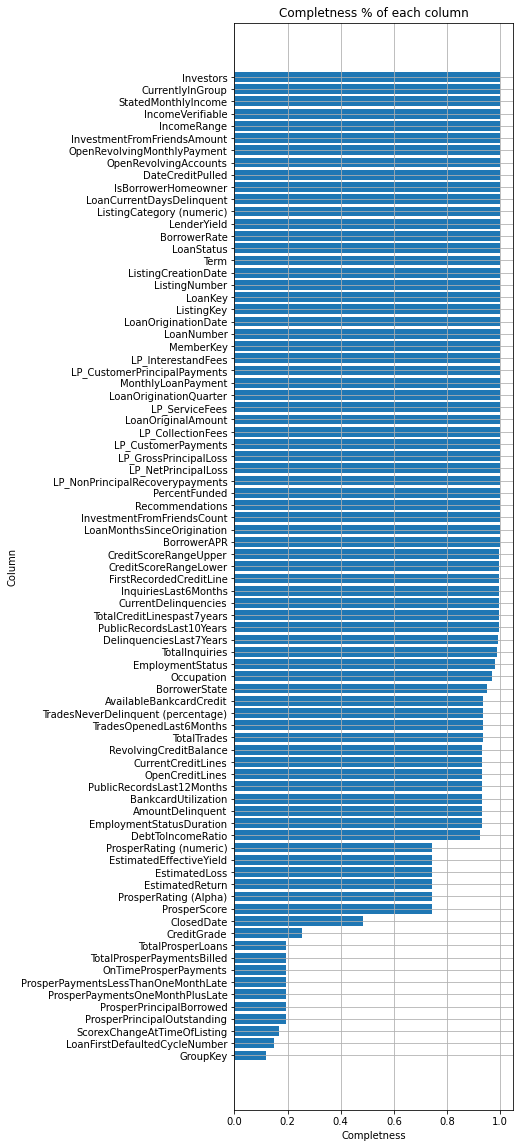

In [4]:
#Plotting the chart on horizontal bar chart
plt.figure(figsize = [5,20])
plt.barh(y = comp.index , width =comp.values)
plt.title("Completness % of each column")
plt.xlabel('Completness')
plt.ylabel('Column')
plt.grid()

### Which categorical variable is important? 
Importance of the categorical variable is determined by the # of unique value, the lower the better. some columns like the names, UUDs... etc. are not very important while visualizing the data

In [5]:
cat_unique = df.select_dtypes('object').nunique().sort_values() #/ df.shape[0])
cat_unique # This series has the unique values ber categorical variable.

ProsperRating (Alpha)           7
EmploymentStatus                8
CreditGrade                     8
IncomeRange                     8
LoanStatus                     12
LoanOriginationQuarter         33
BorrowerState                  51
Occupation                     67
GroupKey                      706
LoanOriginationDate          1873
ClosedDate                   2802
FirstRecordedCreditLine     11585
MemberKey                   90831
DateCreditPulled           112992
ListingCreationDate        113064
LoanKey                    113066
ListingKey                 113066
dtype: int64

***Visually showing the log of unique values per column***

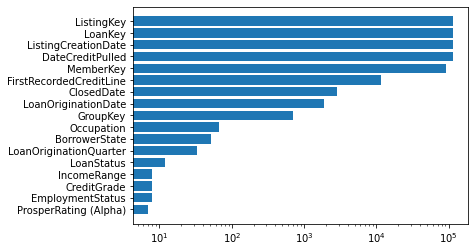

In [6]:
plt.barh(y = cat_unique.index , width =cat_unique.values)
plt.xscale('log')

# Columns transformation

**Converting Date columns**

In [7]:
#
date_col = [ i  for i in df.columns if str(i).endswith('Date')] + ['DateCreditPulled'] + ['FirstRecordedCreditLine']
for _ in date_col: 
    df[_] = pd.to_datetime(df[_])

**Removing categorical columns with more than 100 unique values**

In [8]:
cat_unique = df.select_dtypes('object').nunique().sort_values() #/ df.shape[0])
df.drop(columns = cat_unique[cat_unique >= 100].index ,inplace = True) 

**StatedMonthlyIncome removing outliers and converting to log scale**

In [9]:
df = df[df.StatedMonthlyIncome != df.StatedMonthlyIncome.max()] #remove the outlier
df['StatedMonthlyIncome'] = np.log(df.StatedMonthlyIncome + 1 )


In [68]:
for i in ['BorrowerRate','DebtToIncomeRatio','EmploymentStatusDuration', 'StatedMonthlyIncome', 'LoanOriginalAmount','CurrentCreditLines','TotalCreditLinespast7years']:
    df[i]  = df[i].fillna(0)
    
df['OpenCreditLines']  = df['OpenCreditLines'].astype(int)

# Data visualization

***Scatter numerical variables with scatter plots***

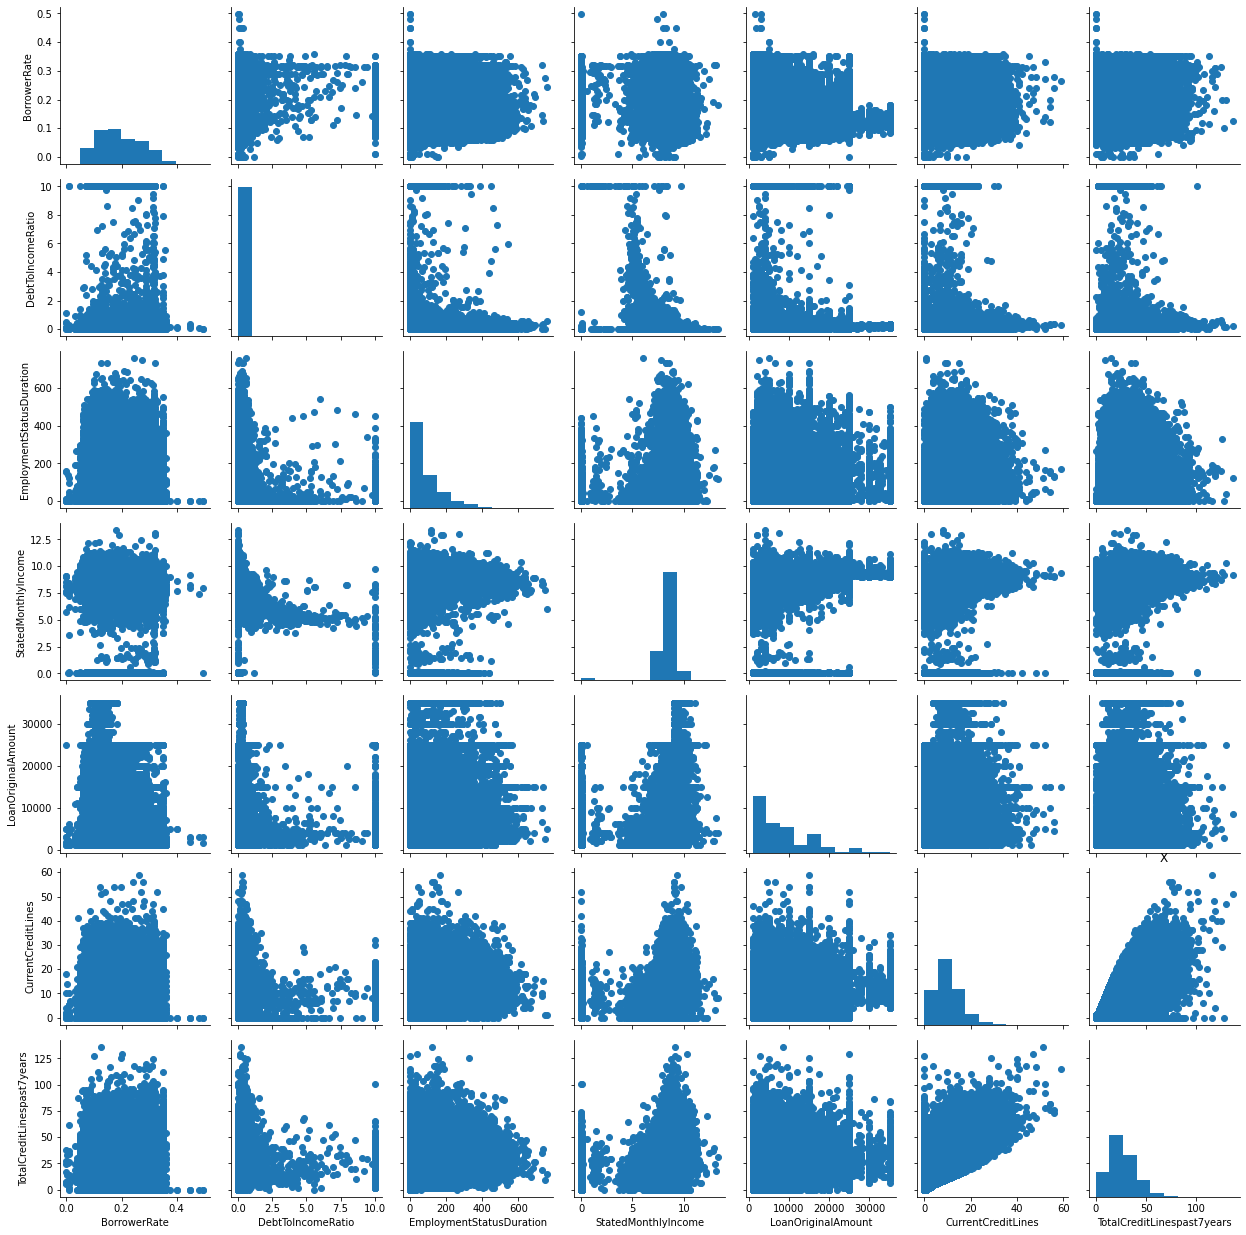

In [69]:
g = sb.PairGrid(data = df, vars = ['BorrowerRate','DebtToIncomeRatio','EmploymentStatusDuration', 'StatedMonthlyIncome', 'LoanOriginalAmount','CurrentCreditLines','TotalCreditLinespast7years'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title('X');

Let's focus on some important variables

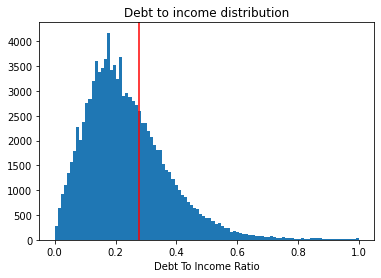

In [11]:
plt.hist(df.DebtToIncomeRatio,bins =np.linspace(0,1,100))
plt.axvline(x=df.DebtToIncomeRatio.mean(), color = 'r');
plt.title('Debt to income distribution')
plt.xlabel('Debt To Income Ratio');

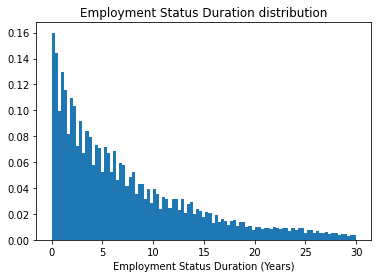

In [12]:
plt.hist(df.EmploymentStatusDuration/12,bins = np.linspace(0,30,100),density  = True );
plt.title('Employment Status Duration distribution')
plt.xlabel('Employment Status Duration (Years)');

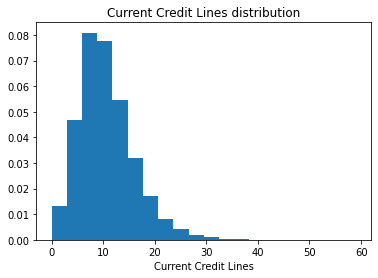

In [13]:
plt.hist(df.CurrentCreditLines,bins = 20,density  = True )
plt.title('Current Credit Lines distribution')
plt.xlabel('Current Credit Lines');

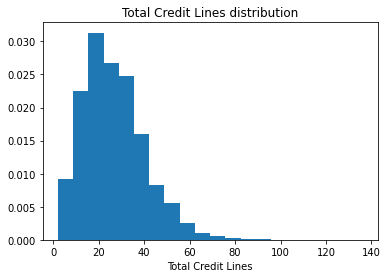

In [14]:
plt.hist(df.TotalCreditLinespast7years,bins = 20,density  = True )
plt.title('Total Credit Lines distribution')
plt.xlabel('Total Credit Lines');

# What happened after 2008 ?
The financial crises happened in 2008, laons defaulted was one of the key factors that caused the crises, what happened before and after 2008, the following charts show the trends of the # of loans , sum of loans and borrower rate per year

***Creating the year columns***

In [15]:
df['LoanOriginationYear']  = pd.DatetimeIndex(df['LoanOriginationDate']).year

***Loan Amount in M$ (red line) Vs Count of loans (blue line) over the years***

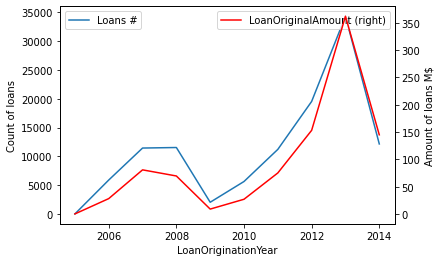

In [16]:
ax = df.groupby(['LoanOriginationYear']).count().max(axis = 1).plot.line()
ax1 = ax.twinx()
(df.groupby(['LoanOriginationYear']).sum()[['LoanOriginalAmount']]/1000000).plot.line(ax=ax1, color='r',secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Amount of loans M$')
ax.legend(['Loans #','Loan M$'])
ax.set_ylabel('Count of loans');

as shown in the graph above, after 2008 there was a sharp decline in # of loans and the amount of money lended, then a ste increase in both metircs, reaching the maximum by 2013.

***Loan Rate % over the years***

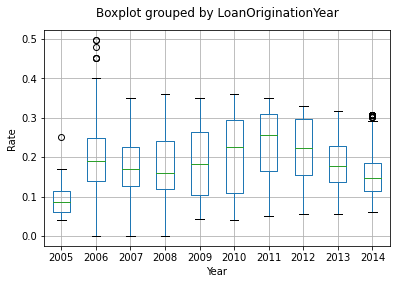

In [17]:
df.boxplot(by="LoanOriginationYear", column="BorrowerRate")
plt.ylabel('Rate')
plt.xlabel('Year')
plt.title('');

as shown in the graph above, after 2008 there was an increase in loan rate after 2008, which is expected, then it started to decline after 2011. 

***Loan status over the years***

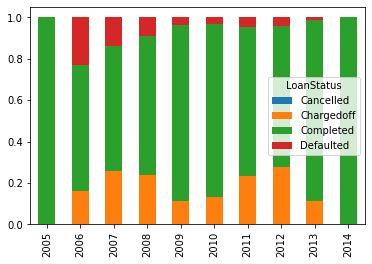

In [19]:
closedLoans = df[~df['ClosedDate'].isna()] 
time_bar(closedLoans,'LoanOriginationYear', 'LoanStatus' )

Loan defaulted was the highest in 2006, started to decline sharply since 2009 with more completed loans, but what is the reason for that ? Let's see why people take loans at first place? 

***Loan reason over the years***

In [20]:
dict_list =  {0 :' Not Available', 1 :' Debt Consolidation', 2 :' Home Improvement', 3 :' Business', 4 :' Personal Loan', 5 :' Student Use', 6 :' Auto', 7:' Other', 8 :' Baby&Adoption', 9 :' Boat', 10 :' Cosmetic Procedure', 11 :' Engagement Ring', 12 :' Green Loans', 13 :' Household Expenses', 14 :' Large Purchases', 15 :' Medical/Dental', 16 :' Motorcycle', 17 :' RV', 18 :' Taxes', 19 :' Vacation', 20 :' Wedding Loans'}
df['loanreason'] = df['ListingCategory (numeric)'].map(dict_list)

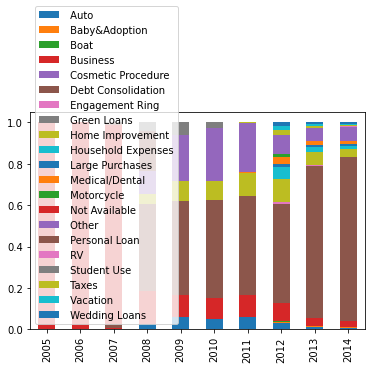

In [21]:
time_bar(df,'LoanOriginationYear','loanreason')
plt.legend()

Well, there're alot of reasons, we can't see much, however, we can see debt consolidation category started to spike after 2008. let's focus a bit on that.  

***% of debt consolidation over the years***

Text(0.5, 1.0, '% of debt consolidation over the years')

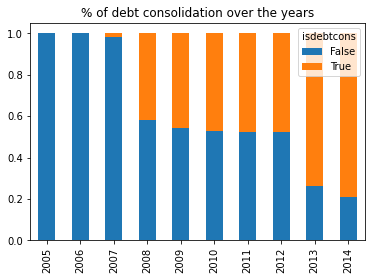

In [53]:
df['isdebtcons'] = df['ListingCategory (numeric)'] == 1
time_bar(df,'LoanOriginationYear','isdebtcons')
plt.title('% of debt consolidation over the years');

As shown above, after 2008 the debt consolidation is the # 1 reason for asking for loans, by 2013 it represented around 80% of the # of loans. interesting, isn't it? 

***# of debt consolidation loans over the years***

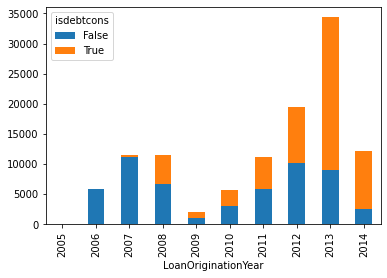

In [23]:
time_bar(df,'LoanOriginationYear','isdebtcons',ispercent = False)

This graph shows that the increase in # of loans is actuall coming from the debt consolidation category.

**When people tend to take debt consolidation loan?**

**# of open credit lines hist** 

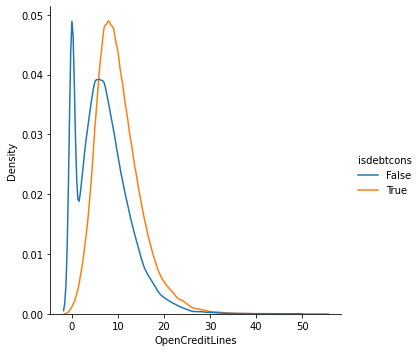

In [70]:
sb.displot(df, x="OpenCreditLines", hue="isdebtcons", kind="kde");

Non debt consolidation seems bi-modal, which make sense, people don't take loans because either they don't have open credit items or they don't like the idea.  

**% of debt consolidation VS open credit lines** 

<Figure size 360x2880 with 0 Axes>

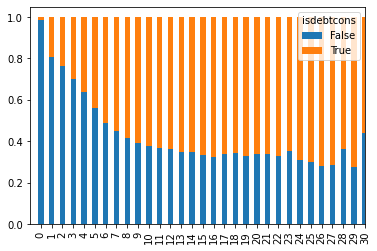

In [74]:
plt.figure(figsize =(5,40) );
ax = time_bar(df,'OpenCreditLines','isdebtcons',ispercent = True);
plt.xlim((-1,30));


Starting from 7 open items we see an increase in the % of dept consolidation.